In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#define basis and relaxation rate
ground1=basis(3,0)
ground2=basis(3,1)
excited=basis(3,2)
gamma=1
gamma13=gamma
gamma23=gamma

In [3]:
sig11=ground1*ground1.dag()
sig21=ground2*ground1.dag()
sig31=excited*ground1.dag()
sig22=ground2*ground2.dag()
sig23=ground2*excited.dag()
sig33=excited*excited.dag()
sig13=sig31.dag()
sig32=sig23.dag()
sig33=excited*excited.dag()

In [4]:
#define initial state and rabi frequencies
init=0.5*ground1*ground1.dag()+0.5*ground2*ground2.dag()
rabi1=0.1*gamma
rabi2=rabi1
rabiMax=np.maximum(rabi1,rabi2)
deltalist = np.linspace(-gamma*0.5,gamma*0.5,501) #detuning range
# optional to add dephasing phenomenologically, as collapse operator sig33
dephase=gamma
rho_33 = []
rho_31 = []
rho_13 = []
chi = []
#collapse operators
col1=np.sqrt(gamma13)*sig13
col2=np.sqrt(gamma23)*sig23
col3=np.sqrt(dephase)*sig33
collapse=[col1,col2]
#collapse=[col1, col2, col3]
sig31=excited*ground1.dag()
#writing the off-diagonal part of the hamiltonian
Hup=rabi1*sig13+rabi2*sig23
Hdown=Hup.dag()
delta0=deltalist[0]
deltaFinal=deltalist[500]

In [5]:
#steady state calculations
for Delta in deltalist:
    Hdiag=-Delta*sig22+Delta/2*sig33
    H=Hup+Hdiag+Hdown
    rho_ss = steadystate(H,collapse)
    
    # save values for plotting later:
    rho_33.append(rho_ss[2,2])  # save the exited state population
    rho_31.append(rho_ss[2,0])  # save the ground-excited coherence
    rho_13.append(rho_ss[0,2])
    
    chi.append(expect(sig31,rho_ss)) 


Text(0, 0.5, '$\\hat{\\rho}_{33}$')

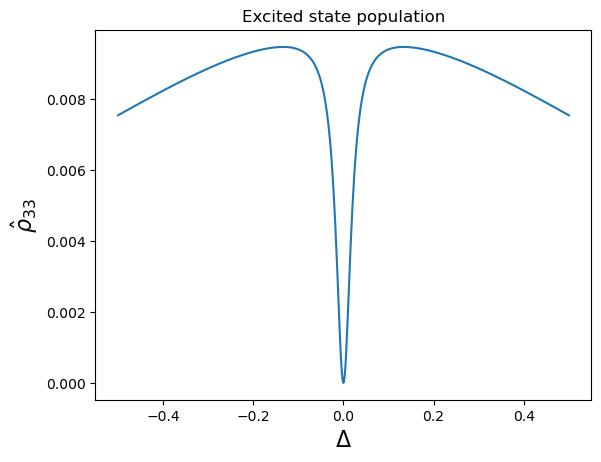

In [8]:
fsize = {'fontsize':'16'}
plt.plot(deltalist,np.real(rho_33))
plt.title("Excited state population")
plt.xlabel("$\Delta$",**fsize)
plt.ylabel("$\hat{\\rho}_{33}$",**fsize)

Text(0.5, 0, '$\\Delta$')

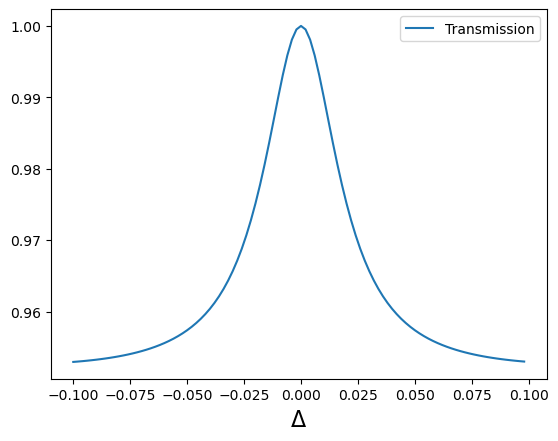

In [9]:
fsize = {'fontsize':'16'}
plt.plot(deltalist[200:300],1-np.imag(chi)[200:300],label="Transmission")
plt.legend()
plt.xlabel("$\Delta$",**fsize)

sweeps=gamma*[0.0001, 0.0002, 0.0003, 0.0005, 0.0007]
ll=0
    #fig, axs = plt.subplots(5)
for sweep in sweeps:    
    def H1_coeff(t,args):
        return delta0+sweep*t
    Hind=Hup+Hdown
    H1=-sig22+0.5*sig33             #time dependent part of the diagonl
    H=[Hind,[H1,H1_coeff]]
    t0=0
    tF=(deltaFinal-delta0)/sweep
    t=np.linspace(t0,tF,10000)
    results=mesolve(H,init,t,collapse)
    chi=expect(sig31,results.states)
    zoomTrans =np.imag(chi)[4400:6000]
    tt=t[4400:6000]
    plt.plot(tt,1-zoomTrans,label="Transmission")
        #    axs[ll].plot(tt,1-zoomTrans,label="Transmission")
    plt.show()
    ll=ll+1

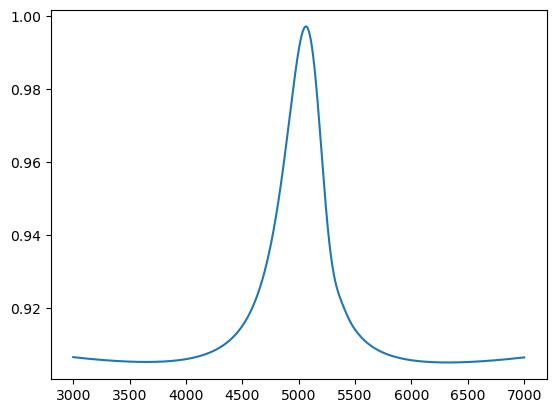

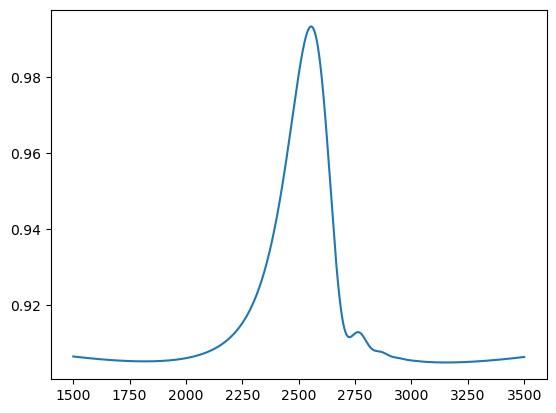

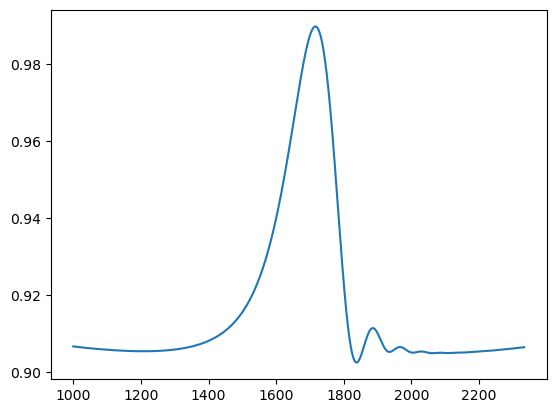

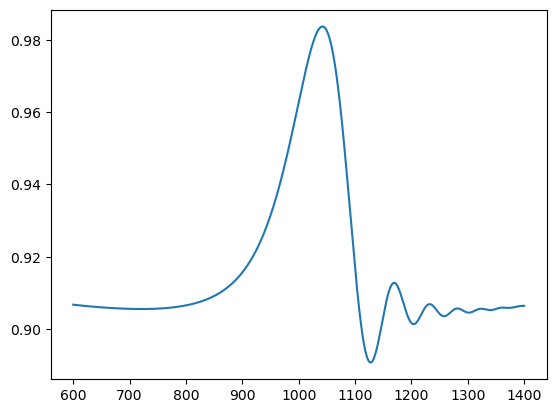

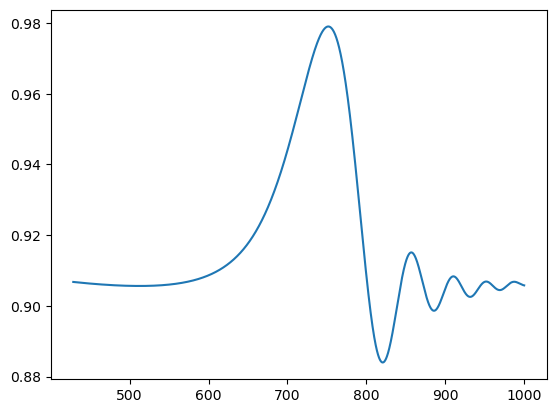

In [10]:
sweeps=gamma*[0.0001, 0.0002, 0.0003, 0.0005, 0.0007] #different rates of scanning 
ll=0
# solving time dependant hamiltonian using mesolve
for sweep in sweeps:    
    def H1_coeff(t,args):
        return delta0+sweep*t
    Hind=Hup+Hdown
    H1=-sig22+0.5*sig33             #time dependent part of the diagonl
    H=[Hind,[H1,H1_coeff]]
    t0=0
    tF=(deltaFinal-delta0)/sweep
    t=np.linspace(t0,tF,10000)
    results=mesolve(H,init,t,collapse)
    chi=expect(sig31,results.states)
    chi2=expect(sig32,results.states)
    zoomTrans =np.imag(chi)[3000:7000]
    zoomTrans2 =np.imag(chi2)[3000:7000]
    tt=t[3000:7000]
    plt.plot(tt,1-zoomTrans2-zoomTrans,label="Transmission")
        #    axs[ll].plot(tt,1-zoomTrans,label="Transmission")
    plt.show()
    ll=ll+1